In [1]:
import json
from statistics_functions import StatisticsFunctions


In [2]:
annotations_path = "/home/swarm/Documents/Number_Of_Cuts/data/train_data.json"
with open(annotations_path, "r") as file:
    annotations = json.load(file)

In [3]:
len(annotations)

830

In [4]:
annotations[10]

{'frame_num': 36048,
 'event_name': 'cold snare',
 'video_filename': 'coloscopie_2022-02-08_08-49-05_HeilEndoBox',
 'polyp_id': 1,
 'crop': [0, 1080, 232, 1692],
 'fps': 50,
 'fold': 47,
 'tool': 'cold snare',
 'resection_number': 256,
 'last_cut': False,
 'first_cut': False,
 'status': 'Verified',
 'idx': 429,
 'cut_frame': 36218}

# Snare cuts data analysis

For the paper we are going to need to report on the data, so its good to have this analysis ready.
We need the following:

- number of cuts of all examination
- number of first cuts (= number of resections)
- Distribution of numbers of cuts
- Distribution of numbers of tools (how many resections had 1,2,3... cuts)
- Number of examinations, resections, cuts per center

Additionally, we will need the above analysis for two categories of subgroups:
1. For each center  (we want to see if the data are the same or different in each center)
2. For the two different types of snares. (We want to see if the use of snare impacts the number of cuts, I assume it does)

It would be nice if the above were implemented in a class/functions that take list of dictionaries as inputs in the form that we have above.
We want this because we will need to update the stats when new data comes.

It would also be nice to save all these statistics each time we produce them with a filename that contains the date.
This way we can monitor the evolution of our training data


## ENJOY

The total number of cuts in the json file is 830
The number of first cut (total number of polyps) in the file is 638
The max polyp ID is 14
The total number of unique filenames is 299
The number of 0,1,2,... cuts is [0, 527, 82, 17, 5, 3, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1]
638


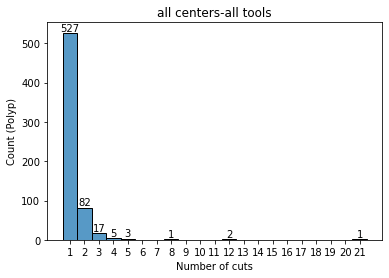

In [6]:
# test functions 
from statistics_functions import StatisticsFunctions
SF = StatisticsFunctions(annotations)
number_of_cuts = SF.calculate_number_of_cuts()
print(f"The total number of cuts in the json file is {number_of_cuts}")
number_of_first_cut = SF.number_of_first_cut()
print(f"The number of first cut (total number of polyps) in the file is {number_of_first_cut}")
max_polyp_id= SF.max_polyp_id()
print(f"The max polyp ID is {max_polyp_id}")
get_all_filename = SF.get_all_filename()
print(f"The total number of unique filenames is {len(get_all_filename)}")
number_of_cuts = SF.number_of_cuts(data= get_all_filename, tool="all") #pass
distribution_number_of_cuts = SF.distribution_number_of_cuts(number_of_cuts)
print(f"The number of 0,1,2,... cuts is {distribution_number_of_cuts}")
print(sum(distribution_number_of_cuts)) #638

SF.distribution_plot(number_of_cuts, title="all centers-all tools")

In [7]:
# Distribution of numbers of cut with cold snare
number_of_cuts = SF.number_of_cuts(data= get_all_filename, tool="cold snare") 
distribution_number_of_cuts = SF.distribution_number_of_cuts(number_of_cuts)
print(f"The number of 0,1,2,... cuts with cold snare is {distribution_number_of_cuts}")
print(f"The total number of cut with cold snare is {sum(distribution_number_of_cuts)}") #511

The number of 0,1,2,... cuts with cold snare is [0, 424, 63, 16, 3, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
The total number of cut with cold snare is 511


In [8]:
number_of_cuts = SF.number_of_cuts(data= get_all_filename, tool="hot snare")
distribution_number_of_cuts = SF.distribution_number_of_cuts(number_of_cuts)
print(f"The number of 0,1,2,... cuts with hot snare is {distribution_number_of_cuts}")
print(f"The total number of cut with hot snare is {sum(distribution_number_of_cuts)}") #127

The number of 0,1,2,... cuts with hot snare is [0, 103, 19, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2]
The total number of cut with hot snare is 127


In [9]:
from statistics_functions import StatisticsFunctions
SF = StatisticsFunctions(annotations)
Boeck_Center = SF.get_filename_by_center(Center="boeck")
#len(Boeck_Center) 
number_of_cuts = SF.number_of_cuts(data = Boeck_Center, tool="cold snare") 
print(number_of_cuts)
distribution_number_of_cuts = SF.distribution_number_of_cuts(number_of_cuts)
print(distribution_number_of_cuts)

[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 3, 2, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 2, 1, 2, 2]
[0, 57, 11, 2, 1]
